In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

folder_path = '/content/drive/MyDrive/Lexicology/Lexicology'  # Replace with your path

if os.path.exists(folder_path):
    files = os.listdir(folder_path)
    for file in files:
        print(file)
else:
    print("Folder not found")


In [ ]:
paths=[]
for file in files:
 full_file_paths = os.path.join(folder_path, file)
 print(full_file_paths)
 paths.append(full_file_paths)


/content/drive/MyDrive/Lexicology/Lexicology/02Alicia020013.cha
/content/drive/MyDrive/Lexicology/Lexicology/03Alicia030024.cha
/content/drive/MyDrive/Lexicology/Lexicology/01Alicia011126.cha
/content/drive/MyDrive/Lexicology/Lexicology/02Char021015.cha
/content/drive/MyDrive/Lexicology/Lexicology/03Char030003.cha
/content/drive/MyDrive/Lexicology/Lexicology/01Darren011030.cha
/content/drive/MyDrive/Lexicology/Lexicology/02Darren020903.cha
/content/drive/MyDrive/Lexicology/Lexicology/01Char011105.cha
/content/drive/MyDrive/Lexicology/Lexicology/03Darren030418.cha
/content/drive/MyDrive/Lexicology/Lexicology/03Janet031111.cha
/content/drive/MyDrive/Lexicology/Lexicology/02Janet021016.cha
/content/drive/MyDrive/Lexicology/Lexicology/04Kasen040009.cha
/content/drive/MyDrive/Lexicology/Lexicology/01Sophie010816.cha
/content/drive/MyDrive/Lexicology/Lexicology/04Katryn040216.cha
/content/drive/MyDrive/Lexicology/Lexicology/04Katryn040315.cha
/content/drive/MyDrive/Lexicology/Lexicology/04Ka

In [ ]:
print(paths)

['/content/drive/MyDrive/Lexicology/Lexicology/02Alicia020013.cha', '/content/drive/MyDrive/Lexicology/Lexicology/03Alicia030024.cha', '/content/drive/MyDrive/Lexicology/Lexicology/01Alicia011126.cha', '/content/drive/MyDrive/Lexicology/Lexicology/02Char021015.cha', '/content/drive/MyDrive/Lexicology/Lexicology/03Char030003.cha', '/content/drive/MyDrive/Lexicology/Lexicology/01Darren011030.cha', '/content/drive/MyDrive/Lexicology/Lexicology/02Darren020903.cha', '/content/drive/MyDrive/Lexicology/Lexicology/01Char011105.cha', '/content/drive/MyDrive/Lexicology/Lexicology/03Darren030418.cha', '/content/drive/MyDrive/Lexicology/Lexicology/03Janet031111.cha', '/content/drive/MyDrive/Lexicology/Lexicology/02Janet021016.cha', '/content/drive/MyDrive/Lexicology/Lexicology/04Kasen040009.cha', '/content/drive/MyDrive/Lexicology/Lexicology/01Sophie010816.cha', '/content/drive/MyDrive/Lexicology/Lexicology/04Katryn040216.cha', '/content/drive/MyDrive/Lexicology/Lexicology/04Katryn040315.cha', '/c

In [ ]:
file_contents = {}

for f in paths:
    try:
        with open(f, 'r') as file:
            content = file.read()
            # Use the file path or a custom key as the dictionary key
            file_name = os.path.basename(f)
            file_contents[file_name] = content
    except FileNotFoundError:
        print(f"File not found: {f}")

print(file_contents)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
extracted_lines = {}

for file_name, content in file_contents.items():
    lines = content.split('\n')
    # Initialize a list to store all '*CHI:' lines for this file
    chi_lines = []
    # Iterate through the lines
    for line in lines:
        if line.startswith('*CHI:'):
            # Extract the line starting with '*CHI:' and add it to the list
            chi_lines.append(line[6:].strip().replace("'", ""))
    # Store the accumulated lines in the dictionary
    extracted_lines[file_name] = chi_lines

print(extracted_lines)


{'02Alicia020013.cha': ['Daddy ha(s) money . \x157862_17651\x15', '<get money> [<] . \x1521036_21712\x15', 'there . \x1521712_24173\x15', 'there . \x1526139_27220\x15', 'no . \x1529661_31524\x15', 'key , that is key . \x1534003_36335\x15', 'oh ! \x1540534_47211\x15', 'oops ! \x1547211_54529\x15', 'have money , have xxx . \x1554529_60617\x15', '[- yue] 一 千 . \x1560617_62890\x15', 'money . \x1562890_66106\x15', 'dollar . \x1574755_76035\x15', '<have> [<] money . \x1577430_77935\x15', 'flower . \x1580834_83333\x15', '<this> [<] one +... \x1586487_87404\x15', '<have> [<] xxx . \x1588251_88927\x15', 'another one . \x1590252_92217\x15', 'flower . \x1593425_95227\x15', 'there . \x1598344_98728\x15', 'this ones the <same xxx> [>] . \x1598728_104142\x15', '<this> [<] (.) not the same . \x15104968_106760\x15', 'cow . \x15111025_113152\x15', 'red . \x15121623_123015\x15', 'cow . \x15140461_140889\x15', 'okay , what (.) hat (.) egg [?] . \x15150922_155883\x15', 'same . \x15158620_159610\x15', '<fl

In [ ]:
import re

def remove_enclosed_phrases(line):
    line = re.sub(r'<[^>]*>', '', line)
    line = re.sub(r'\[[^\]]*\]', '', line)
    return line

# Initialize a dictionary to store the cleaned phrases for each file
cleaned_phrases = {}

# Define a regular expression pattern to match words or letters
pattern = r'[a-zA-Z]+'

# Iterate through each file and its lines in the extracted_lines dictionary
for file_name, lines in extracted_lines.items():
    # Initialize a list to store cleaned lines for this file
    file_cleaned_lines = []

    for line in lines:
        line = remove_enclosed_phrases(line)
        # Extract phrases using the regular expression pattern
        phrases = re.findall(pattern, line)

        # Join the extracted phrases to form a cleaned line
        cleaned_line = ' '.join(phrases)

        if cleaned_line:
            file_cleaned_lines.append(cleaned_line)

    # Store the cleaned lines for this file in the cleaned_phrases dictionary
    cleaned_phrases[file_name] = file_cleaned_lines

# Print the cleaned phrases for each file
for file_name, phrases in cleaned_phrases.items():
    print(f"{file_name}:")
    for phrase in phrases:
        print(phrase)
    print()  # Print a newline for better readability between files



Streaming output truncated to the last 5000 lines.
Ill put her clothes first
put her clothes
I got many clothes
no she hafta put it
no
she hafta
she hafta
give this small
she not teddy bear
she a baby
Baby
yeah
no
child
child
no
no this a xxx a cracket
crackets
for the cracket
be cause I have it
no
yeh
so small
she will wear it
wear s it s
she will wear this
yes
Im doing it slowly
no hospital there
no hospital aa s
no hospital xxx
yeah
yeh
hospital
no hospital
if hospital
no
only the doctor
no
I love the doctor
yeah
where is Bella
where
she there
yeh
no
when Mummys around its
I put her clothes already
okay she lie down with them
she lie down with them
there
Ill go to Emily
Ill pick Emily
laugh
she cant
because she cant
xxx
yeah
she only a baby
only a baby
xxx
yeah
you want the house
you want to make a house
together okay
together
you want
no you hafta xxx on the bedroom
I want to make a house
yeh
to put this
I will put this
make a school
xxx another one
wheres daughter
we cant
daughter

In [ ]:
print(cleaned_phrases)

{'02Alicia020013.cha': ['Daddy ha s money', 'there', 'there', 'no', 'key that is key', 'oh', 'oops', 'have money have xxx', 'money', 'dollar', 'money', 'flower', 'one', 'xxx', 'another one', 'flower', 'there', 'this ones the', 'not the same', 'cow', 'red', 'cow', 'okay what hat egg', 'same', 'flower', 'wheres money inside', 'Daddy have money ha ve', 'there', 'have Daddy', 'xxx', 'Timmy', 'Sophie', 'Alicia', 'put in', 'so', 'put the', 'put in picture', 'put in picture', 'teacher picture', 'put in there', 'I want put this one', 'Sophie', 'I want see the', 'Sophie', 'Sophie', 'Daddy', 's this one Daddy', 'xxx Daddy', 'ha ve your Daddy the same xxx', 'the same', 'this one this glasses this ha ve glasses', 'I want see Timmy A', 'has Alicia', 'Alicia', 'Alicia', 'Kitty', 'picture Timmy', 'I want see the money', 'see the money', 'see the money', 'see the money', 'that', 'xxx this', 'oh xxx', 'xxx Citi', 'xxx', 'Daddy have money there', 'xxx', 'oh', 'I xxx', 'xxx', 'money can see', 'no more', 

In [ ]:
import nltk
nltk.download('punkt')

# Initialize a dictionary to store the tokenized phrases for each file
tokenized = {}

# Iterate through each file and its list of cleaned phrases
for file_name, phrases in cleaned_phrases.items():
    # Initialize a list to store all tokens for this file
    file_all_tokens = []

    for phrase in phrases:
        # Tokenize the phrase
        tokens = nltk.word_tokenize(phrase)

        # Extend the file's token list with these tokens
        file_all_tokens.extend(tokens)

    # Store the complete list of tokens for this file in the tokenized dictionary
    tokenized[file_name] = file_all_tokens

# Print the complete list of tokens for each file
for file_name, tokens in tokenized.items():
    print(f"{file_name}:")
    print(tokens)
    print()  # Print a newline for better readability between files




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


02Alicia020013.cha:
['Daddy', 'ha', 's', 'money', 'there', 'there', 'no', 'key', 'that', 'is', 'key', 'oh', 'oops', 'have', 'money', 'have', 'xxx', 'money', 'dollar', 'money', 'flower', 'one', 'xxx', 'another', 'one', 'flower', 'there', 'this', 'ones', 'the', 'not', 'the', 'same', 'cow', 'red', 'cow', 'okay', 'what', 'hat', 'egg', 'same', 'flower', 'wheres', 'money', 'inside', 'Daddy', 'have', 'money', 'ha', 've', 'there', 'have', 'Daddy', 'xxx', 'Timmy', 'Sophie', 'Alicia', 'put', 'in', 'so', 'put', 'the', 'put', 'in', 'picture', 'put', 'in', 'picture', 'teacher', 'picture', 'put', 'in', 'there', 'I', 'want', 'put', 'this', 'one', 'Sophie', 'I', 'want', 'see', 'the', 'Sophie', 'Sophie', 'Daddy', 's', 'this', 'one', 'Daddy', 'xxx', 'Daddy', 'ha', 've', 'your', 'Daddy', 'the', 'same', 'xxx', 'the', 'same', 'this', 'one', 'this', 'glasses', 'this', 'ha', 've', 'glasses', 'I', 'want', 'see', 'Timmy', 'A', 'has', 'Alicia', 'Alicia', 'Alicia', 'Kitty', 'picture', 'Timmy', 'I', 'want', 'see'

In [ ]:
!pip install nltk
import nltk
nltk.download('words')


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import nltk
from nltk.corpus import words
from langdetect import detect

# Get a set of lowercase English words for fast lookup
english_vocab = set(words.words())

# Initialize a dictionary to store the filtered tokens
filtered_tokenized = {}

# Iterate over the tokenized data
for file_name, tokens in tokenized.items():
    # Filter out non-English words using language detection
    filtered_tokens = [token for token in tokens if detect(token) == 'en' and token.lower() in english_vocab]

    # Store the filtered tokens
    filtered_tokenized[file_name] = filtered_tokens

# Print the filtered tokens for each file
for file_name, tokens in filtered_tokenized.items():
    print(f"{file_name}:")
    print(tokens)
    print()  # Print a newline for better readability between files


02Alicia020013.cha:
['money', 'there', 'there', 'that', 'money', 'money', 'money', 'flower', 'another', 'flower', 'there', 'this', 'the', 'the', 'what', 'hat', 'flower', 'money', 'money', 'there', 'the', 'teacher', 'there', 'this', 'the', 'this', 'the', 'the', 'this', 'this', 'this', 'the', 'money', 'the', 'money', 'the', 'money', 'the', 'money', 'that', 'this', 'money', 'there', 'money', 'money', 'this', 'honey', 'coffee', 'the', 'and', 'this', 'its', 'this', 'three', 'four', 'money', 'and', 'money', 'and', 'the', 'and', 'the', 'and', 'the', 'the', 'its', 'and', 'the', 'money', 'money', 'this', 'this', 'this']

03Alicia030024.cha:
['this', 'this', 'when', 'that', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'eat', 'eating', 'four', 'its', 'and', 'and', 'its', 'Ted', 'Ted', 'this', 'this', 'this', 'and', 'this', 'and', 'this', 'this', 'this', 'the', 'there', 'there', 'this', 'this', 'this', 'the', 'and', 'this', 'and', 'then', 'this', 'its', 'what', 'this', 'to', 'the', 'thi

In [ ]:
import nltk
from nltk.corpus import words

# Get a set of English words for fast lookup
english_vocab = set(words.words())

# Initialize a dictionary to store the filtered tokens
filtered_tokenized = {}

# Iterate over the tokenized data
for file_name, tokens in tokenized.items():
    # Filter out non-English words
    filtered_tokens = [token for token in tokens if token.lower() in english_vocab]

    # Store the filtered tokens
    filtered_tokenized[file_name] = filtered_tokens

# Print the filtered tokens for each file
for file_name, tokens in filtered_tokenized.items():
    print(f"{file_name}:")
    print(tokens)
    print()  # Print a newline for better readability between files


In [ ]:
# Sample dictionary
# tokenized = {'01_File1': [tokens...], '01_File2': [tokens...], '02_File1': [tokens...], ...}

# Initialize a dictionary for merged results
merged_tokenized = {}

# Iterate through the original dictionary
for key, tokens in filtered_tokenized.items():
    # Determine the prefix (first two numbers of the key)
    prefix = key[:2]

    # If the prefix is not in the merged dictionary, initialize it with an empty list
    if prefix not in merged_tokenized:
        merged_tokenized[prefix] = []

    # Extend the list associated with the prefix with the current tokens
    merged_tokenized[prefix].extend(tokens)

# Print the merged results
for prefix, merged_tokens in merged_tokenized.items():
    print(f"{prefix}:")
    print(merged_tokens)
    print()  # Print a newline for better readability


02:
['money', 'there', 'there', 'that', 'money', 'money', 'money', 'flower', 'another', 'flower', 'there', 'this', 'the', 'the', 'what', 'hat', 'flower', 'money', 'money', 'there', 'the', 'teacher', 'there', 'this', 'the', 'this', 'the', 'the', 'this', 'this', 'this', 'the', 'money', 'the', 'money', 'the', 'money', 'the', 'money', 'that', 'this', 'money', 'there', 'money', 'money', 'this', 'honey', 'coffee', 'the', 'and', 'this', 'its', 'this', 'three', 'four', 'money', 'and', 'money', 'and', 'the', 'and', 'the', 'and', 'the', 'the', 'its', 'and', 'the', 'money', 'money', 'this', 'this', 'this', 'what', 'clothes', 'clothes', 'its', 'this', 'first', 'the', 'clothes', 'its', 'too', 'another', 'clothes', 'to', 'to', 'the', 'clothes', 'it', 'this', 'the', 'clothes', 'its', 'too', 'this', 'its', 'its', 'finished', 'crying', 'with', 'with', 'with', 'with', 'they', 'food', 'people', 'found', 'the', 'this', 'they', 'there', 'cracker', 'they', 'cracker', 'they', 'cracker', 'them', 'cracker', 't

In [ ]:
# Define the specific token you want to remove
token_to_remove = 'a'

# Assuming 'merged_tokenized' is your dictionary
# merged_tokenized = {'01': [list of tokens], '02': [list of tokens], ...}

# Iterate over each key-value pair in the dictionary
for key in merged_tokenized:
    # Filter out the specific token from the list of tokens
    merged_tokenized[key] = [token for token in merged_tokenized[key] if token != token_to_remove]

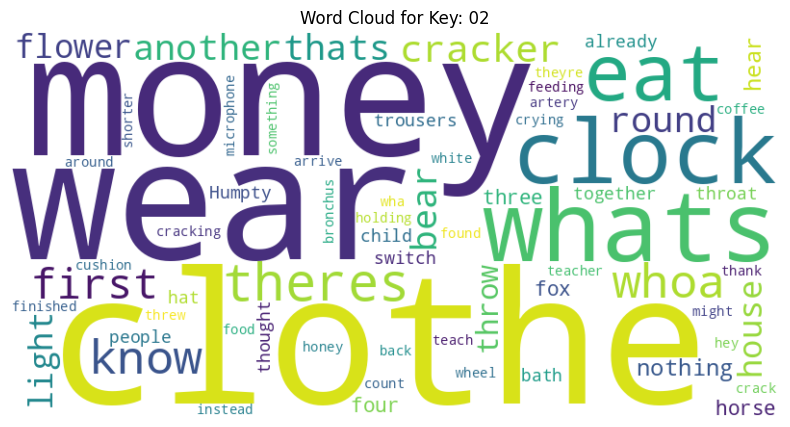

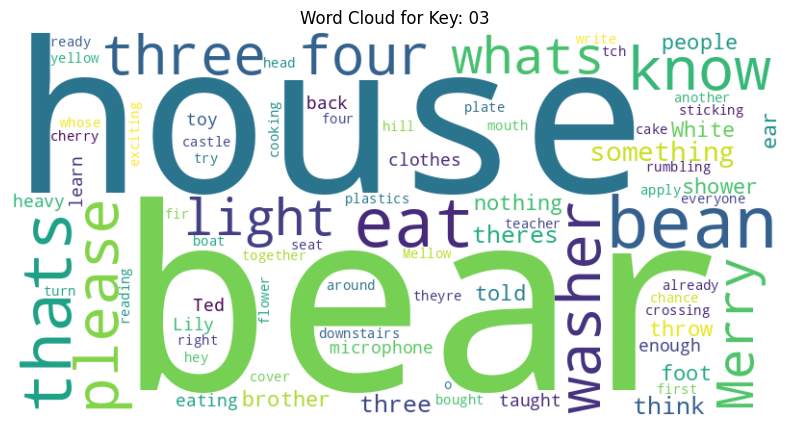

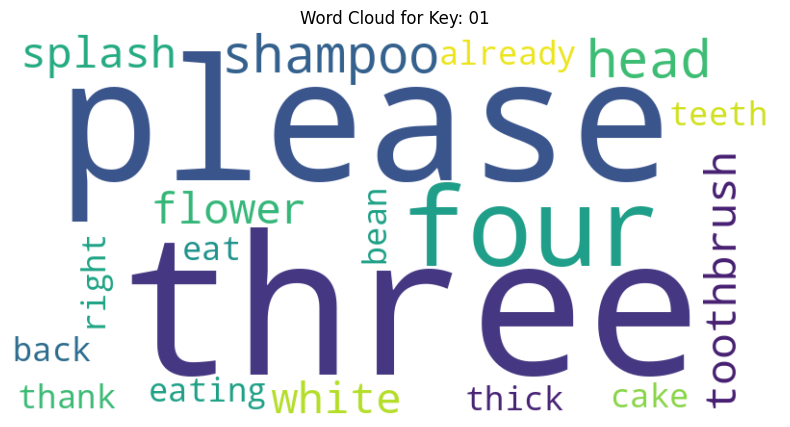

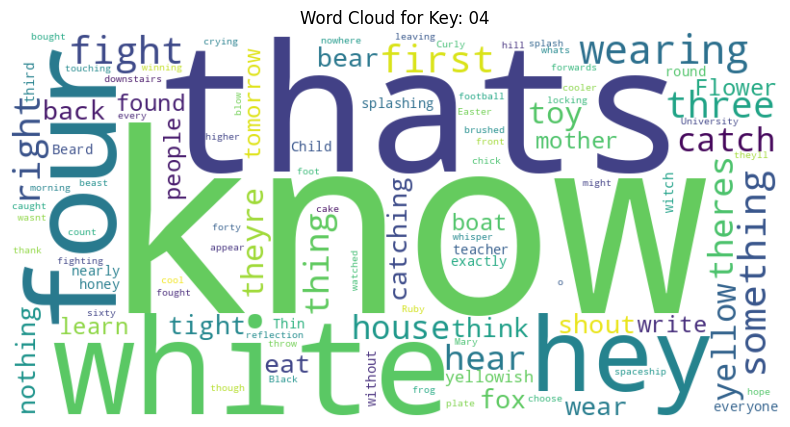

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'merged_tokenized' is your dictionary with keys and list of tokens
# merged_tokenized = {'01': [list of tokens], '02': [list of tokens], ...}

for key, tokens in merged_tokenized.items():
    # Join the tokens into a single string
    text = ' '.join(tokens)

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Key: {key}")
    plt.axis('off')
    plt.show()


In [ ]:
!pip install nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
from collections import Counter

# Assuming 'merged_tokenized' is your dictionary
# merged_tokenized = {'01': [list of tokens], '02': [list of tokens], ...}

for key, tokens in merged_tokenized.items():
    # Tag tokens with POS tags
    tagged_tokens = nltk.pos_tag(tokens)

    # Extract just the POS tags
    pos_tags = [tag for word, tag in tagged_tokens]

    # Count the frequency of each POS tag
    pos_freq = Counter(pos_tags)

    # Display the most common POS tags for this key
    print(f"Most Common POS Tags for Key: {key}")
    for pos, freq in pos_freq.most_common(10):  # Adjust number as needed
        print(f"{pos}: {freq}")
    print()  # Print a newline for better readability


Most Common POS Tags for Key: 02
DT: 412
NN: 101
TO: 94
PRP$: 76
IN: 55
RB: 50
CC: 47
EX: 39
PRP: 31
NNS: 29

Most Common POS Tags for Key: 03
DT: 261
TO: 107
NN: 79
WRB: 73
CC: 71
IN: 50
RB: 46
PRP$: 40
VB: 30
EX: 27

Most Common POS Tags for Key: 01
DT: 24
NN: 10
RB: 9
IN: 8
CD: 7
PRP$: 7
WP: 6
EX: 5
CC: 5
JJ: 5

Most Common POS Tags for Key: 04
DT: 300
CC: 171
NN: 131
IN: 123
PRP$: 116
TO: 99
RB: 78
VB: 51
JJ: 44
PRP: 33



In [ ]:
from collections import Counter

# Assuming 'merged_tokenized' is your dictionary
# merged_tokenized = {'01': [list of tokens], '02': [list of tokens], ...}

for key, tokens in merged_tokenized.items():
    # Count the frequency of each token
    token_freq = Counter(tokens)

    # Display the most common tokens for this key
    print(f"Most Common Tokens for Key: {key}")
    for token, freq in token_freq.most_common(100):  # Adjust number as needed
        print(f"{token}: {freq}")
    print()  # Print a newline for better readability


Most Common Tokens for Key: 02
the: 208
this: 186
to: 94
its: 76
that: 61
there: 53
and: 47
they: 23
then: 22
money: 17
clothes: 17
wear: 17
whats: 16
clock: 14
eat: 11
theres: 11
know: 9
whoa: 9
where: 8
what: 7
first: 7
with: 7
another: 6
cracker: 6
them: 6
bear: 6
off: 6
thats: 6
round: 6
flower: 5
too: 5
because: 5
house: 5
light: 5
throw: 4
nothing: 4
hear: 4
three: 3
four: 3
only: 3
fox: 3
clothe: 3
horse: 3
hat: 2
it: 2
people: 2
child: 2
already: 2
together: 2
other: 2
throat: 2
of: 2
thought: 2
switch: 2
trousers: 2
Humpty: 2
bath: 2
teacher: 1
honey: 1
coffee: 1
finished: 1
crying: 1
food: 1
found: 1
crackers: 1
should: 1
crack: 1
cracking: 1
as: 1
when: 1
around: 1
arrive: 1
from: 1
teach: 1
wheel: 1
such: 1
count: 1
artery: 1
bronchus: 1
instead: 1
might: 1
thank: 1
hey: 1
threw: 1
holding: 1
microphone: 1
cushion: 1
theyre: 1
shorter: 1
white: 1
who: 1
back: 1
feeding: 1
wha: 1
something: 1

Most Common Tokens for Key: 03
the: 137
to: 107
this: 106
and: 70
why: 61
that: 51

In [ ]:
# Sample structure of your dictionary
# merged_tokenized = {'02': [list of tokens], '03': [list of tokens], '01': [list of tokens], '04': [list of tokens]}

# Initialize a dictionary to store the count of unique words for each key
unique_word_counts = {}

for key, tokens in merged_tokenized.items():
    # Convert the list of tokens to a set to remove duplicates and count the unique words
    unique_word_counts[key] = len(set(tokens))

# Print the count of unique words for each key
for key, count in unique_word_counts.items():
    print(f"Key {key} has {count} unique words.")


Key 02 has 95 unique words.
Key 03 has 109 unique words.
Key 01 has 34 unique words.
Key 04 has 148 unique words.


# Code switching

In [ ]:
import re

# Sample structure of your dictionary
# extracted_lines = {'File1': ['Line1 content', 'Line2 content', ...], 'File2': ['Line1 content', 'Line2 content', ...]}

# Initialize a dictionary to store the cleaned lines
cleaned_lines = {}

# Define a regular expression pattern that matches everything except Cantonese kanji, letters, and basic punctuation
pattern = r'[^\u4e00-\u9fffA-Za-z\s]'

# Iterate through each file and its lines
for file_name, lines in extracted_lines.items():
    # Initialize a list to store cleaned lines for this file
    file_cleaned_lines = []

    for line in lines:
        # Clean the line by replacing matched patterns with an empty string
        cleaned_line = re.sub(pattern,'',line)

        # Add the cleaned line to the list
        file_cleaned_lines.append(cleaned_line)

    # Store the cleaned lines for this file
    cleaned_lines[file_name] = file_cleaned_lines

# Print the cleaned lines for each file
for file_name, lines in cleaned_lines.items():
    print(f"{file_name}:")
    for line in lines:
        print(line)
    print()  # Print a newline for better readability between files


Streaming output truncated to the last 5000 lines.
dat dan  
dat dan  
dat dan  
dat dan  
yeah   
Darren  
it   
yeah  yeah  yeah  
xxx  
xxx  
xxx  
xxx   
mm  
xxx  
no more puddles   
dry  
no  
no more book  
xxx   
xxx  
making raisin  
be careful  
Ill   
Ill  
can   
make  
raisins  
need   
xxx  
im  
dan  dan  dan  
on  
keep it  
xxx  
this is   
xxx   
xxx   
this  this  ah  this  this   
necklace   
again   
shouts  
shouts  
turn on  
on  
no more  
necklace   
no more  
no more  no  more  
mm  
sand   
pushing    
xxx  
bucket  
step xxx  
raining   
raining   
xxx  
xxx  
swimming   
no more xxx  
no more xxx  
no more sad  sand   
mister sun  
mister sun  going down   
bye bye mister  sun  
bye bye  
mister sun  
sun  
mister sun  sun  
xxx me  
xxx  
tap  tap  
xxx tap  
tap  
tap  
put your hand in   
tap  
water  
and dash  splash  water away  
splash water away  
push  
I push  I push  I push   I push  
I push  I push  
I push  I push  
xxx  
wah  wah  
Darren  
bi

In [ ]:
import nltk
import re

# Sample structure of your dictionary
# cleaned_lines = {'File1': ['Line1 content', 'Line2 content', ...], 'File2': ['Line1 content', 'Line2 content', ...]}

# Initialize a dictionary to store the tokenized lines
tokenized_lines = {}

# Define a regular expression pattern to match English words and Cantonese kanji separately
pattern = r'[\u4e00-\u9fff]+|[A-Za-z]+|\S'

# Iterate through each file and its lines
for file_name, lines in cleaned_lines.items():
    # Initialize a list to store tokenized lines for this file
    file_tokenized_lines = []

    for line in lines:
        # Find all matches in the line - this will include English words and Cantonese kanji
        tokens = re.findall(pattern, line)

        # Extend the file's token list with these tokens
        file_tokenized_lines.extend(tokens)

    # Store the tokenized lines for this file
    tokenized_lines[file_name] = file_tokenized_lines

# Print the tokenized lines for each file
print(tokenized_lines)


{'02Alicia020013.cha': ['Daddy', 'has', 'money', 'get', 'money', 'there', 'there', 'no', 'key', 'that', 'is', 'key', 'oh', 'oops', 'have', 'money', 'have', 'xxx', 'yue', '一', '千', 'money', 'dollar', 'have', 'money', 'flower', 'this', 'one', 'have', 'xxx', 'another', 'one', 'flower', 'there', 'this', 'ones', 'the', 'same', 'xxx', 'this', 'not', 'the', 'same', 'cow', 'red', 'cow', 'okay', 'what', 'hat', 'egg', 'same', 'flower', 'no', 'more', 'flower', 'flower', 'wheres', 'money', 'inside', 'Daddy', 'have', 'money', 'have', 'there', 'have', 'Daddy', 'xxx', 'Timmy', 'Sophie', 'Alicia', 'put', 'in', 'so', 'put', 'the', 'put', 'in', 'picture', 'put', 'in', 'picture', 'teacher', 'picture', 'put', 'in', 'there', 'xxx', 'money', 'xxx', 'I', 'want', 'put', 'this', 'one', 'this', 'one', 'Sophie', 'I', 'want', 'see', 'the', 'Sophie', 'Sophie', 'Sophie', 'Daddy', '都', 's', 'this', 'one', 'Daddy', 'xxx', 'Daddy', 'have', 'your', 'Daddy', 'the', 'same', 'xxx', 'the', 'same', 'this', 'one', 'this', 'g

In [ ]:
merged_tokenized = {}

# Iterate through the original dictionary
for key, tokens in tokenized_lines.items():
    # Determine the prefix (first two numbers of the key)
    prefix = key[:2]

    # If the prefix is not in the merged dictionary, initialize it with an empty list
    if prefix not in merged_tokenized:
        merged_tokenized[prefix] = []

    # Extend the list associated with the prefix with the current tokens
    merged_tokenized[prefix].extend(tokens)

# Print the merged results
for prefix, merged_tokens in merged_tokenized.items():
    print(f"{prefix}:")
    print(merged_tokens)
    print()  # Print a newline for better readability

02:
['Daddy', 'has', 'money', 'get', 'money', 'there', 'there', 'no', 'key', 'that', 'is', 'key', 'oh', 'oops', 'have', 'money', 'have', 'xxx', 'yue', '一', '千', 'money', 'dollar', 'have', 'money', 'flower', 'this', 'one', 'have', 'xxx', 'another', 'one', 'flower', 'there', 'this', 'ones', 'the', 'same', 'xxx', 'this', 'not', 'the', 'same', 'cow', 'red', 'cow', 'okay', 'what', 'hat', 'egg', 'same', 'flower', 'no', 'more', 'flower', 'flower', 'wheres', 'money', 'inside', 'Daddy', 'have', 'money', 'have', 'there', 'have', 'Daddy', 'xxx', 'Timmy', 'Sophie', 'Alicia', 'put', 'in', 'so', 'put', 'the', 'put', 'in', 'picture', 'put', 'in', 'picture', 'teacher', 'picture', 'put', 'in', 'there', 'xxx', 'money', 'xxx', 'I', 'want', 'put', 'this', 'one', 'this', 'one', 'Sophie', 'I', 'want', 'see', 'the', 'Sophie', 'Sophie', 'Sophie', 'Daddy', '都', 's', 'this', 'one', 'Daddy', 'xxx', 'Daddy', 'have', 'your', 'Daddy', 'the', 'same', 'xxx', 'the', 'same', 'this', 'one', 'this', 'glasses', 'this', 'h

In [ ]:
from collections import Counter

for key, tokens in merged_tokenized.items():
    # Count the frequency of each token
    token_freq = Counter(tokens)

    # Display the most common tokens for this key
    print(f"Most Common Tokens for Key: {key}")
    for token, freq in token_freq.most_common(20):  # Adjust number as needed
        print(f"{token}: {freq}")
    print()  # Print a newline for better readability

Most Common Tokens for Key: 02
the: 246
I: 215
this: 208
xxx: 184
yue: 135
yes: 127
to: 114
is: 112
put: 96
its: 91
want: 84
no: 83
it: 78
yeah: 71
a: 68
one: 65
that: 64
she: 64
there: 54
like: 50

Most Common Tokens for Key: 03
I: 168
the: 157
xxx: 153
this: 123
to: 117
is: 102
no: 96
want: 94
yes: 91
and: 83
you: 81
a: 76
she: 76
yue: 74
why: 70
one: 61
that: 55
there: 50
yeh: 46
its: 41

Most Common Tokens for Key: 01
xxx: 279
yue: 109
呀: 56
no: 42
I: 32
Ellie: 31
laugh: 30
this: 24
here: 20
sun: 18
nappie: 18
want: 16
that: 15
yeah: 15
mister: 13
Baby: 13
one: 12
more: 12
what: 12
down: 12

Most Common Tokens for Key: 04
you: 279
I: 261
no: 251
and: 176
this: 172
yue: 164
is: 153
the: 150
xxx: 139
a: 130
not: 120
to: 115
it: 109
its: 108
one: 99
here: 92
dont: 75
know: 69
have: 62
of: 61



In [ ]:
import zipfile

# Define the path to the ZIP file and the target directory
zip_file_path = '/content/Ping.woff2.zip'  # Replace with the actual file name
target_directory = '/content'  # Replace with the desired target directory

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_directory)


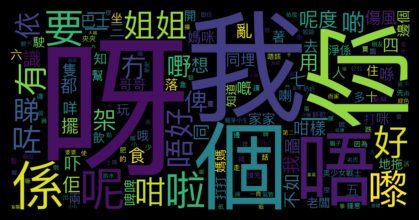

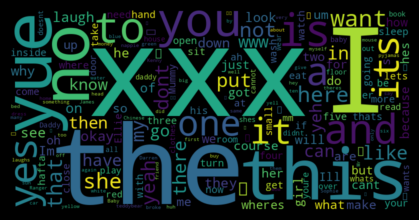

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the tokens from merged_tokenized
all_tokens = [token for tokens in merged_tokenized.values() for token in tokens]

# Separate Cantonese and English tokens
cantonese_tokens = [token for token in all_tokens if '\u4e00' <= token <= '\u9fff']
english_tokens = [token for token in all_tokens if token.isalpha()]

# Count the frequency of each token for Cantonese and English separately
cantonese_word_counts = Counter(cantonese_tokens)
english_word_counts = Counter(english_tokens)

# Create separate WordClouds for Cantonese and English
cantonese_wordcloud = WordCloud(font_path="/content/PingFang.ttf",
                                background_color='black',
                                width=1600, height=800
                                )
english_wordcloud = WordCloud(width=800, height=400).generate(text)


# Generate the WordCloud using the word counts for Cantonese
cantonese_wordcloud.generate_from_frequencies(cantonese_word_counts)

# Generate the WordCloud using the word counts for English
english_wordcloud.generate_from_frequencies(english_word_counts)

# Display the Cantonese WordCloud
plt.figure(figsize=(5, 2), facecolor='k')
plt.imshow(cantonese_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Display the English WordCloud
plt.figure(figsize=(5, 2), facecolor='k')
plt.imshow(english_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

